# Introduction to the Research Environment

 The research environment is powered by IPython notebooks, which allow one to perform a great deal of data analysis and statistical validation. We'll demonstrate a few simple techniques here.

## Code Cells vs. Text Cells

     As you can see, each cell can be either code or text. To select between them, choose from the 'Cell Type' dropdown menu on the top left.

# Executing a Command

     A code cell will be evaluated when you press play, or when you press the shortcut, shift-enter. Evaluating a cell evaluates each line of code in sequence, and prints the results of the last line below the cell.

## To create a formula in markdown cell use the following syntax
put double dollar sing $

$$2 x^2 + zy* 2$$

In [3]:
from jupyter_lsp.specs import ts_old

2 + 2

4

Only last line will be printed

In [4]:
2 + 2
3 + 2

5

If needs to print and this line is not in the last line, use print function

In [5]:
print(2 + 2)
3+2

4


5

## Knowing When a Cell is Running

         While a cell is running, a [*] will display on the left. When a cell has yet to be executed, [ ] will display. When it has been run, a number will display indicating the order in which it was run during the execution of the notebook [8].

In [6]:
c = 0
for i in range(10000000):
    c = c + i
c

49999995000000

## Importing Libraries

     The vast majority of the time, you'll want to use functions from pre-built libraries. You can't import every library on Quantopian due to security issues, but you can import most of the common scientific ones. Here I import numpy and pandas, the two most common and useful libraries in quant finance.

In [7]:
import numpy as np
import pandas as pd

# This is a plotting librarry for pretty pictures.

import matplotlib.pyplot as plt

## Getting Documentation Help

         When a function is followed by a ?, running the cell will bring up the documentation for that function. A double question mark will bring up the source code for that function.


In [8]:
np.random.normal?

## Sampling

     We'll sample some random data using a function from numpy.

In [17]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.
x = np.random.normal(0, 1, 100)

## Plotting

         Data is only useful if we can visualize it. We'll use the plotting library, matplotlib, to create a simple line plot.

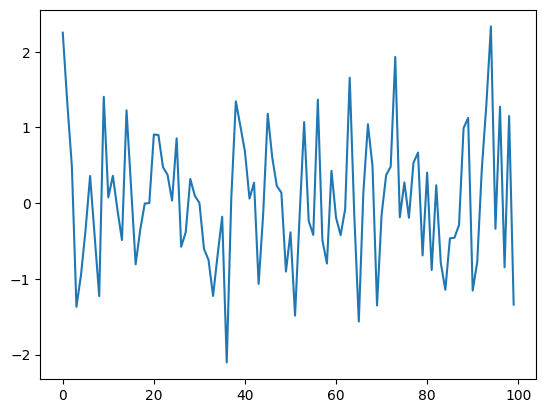

In [18]:
plt.plot(x)

## Squaelching Line Output

         You might have noticed the annoying line of the form [<matplotlib.lines.Line2D at 0x7f72fdbc1710>]. This is because the .plot function actually produces output. Sometimes we wish not to display output, we can accomplish this with the semi-colon as follows.

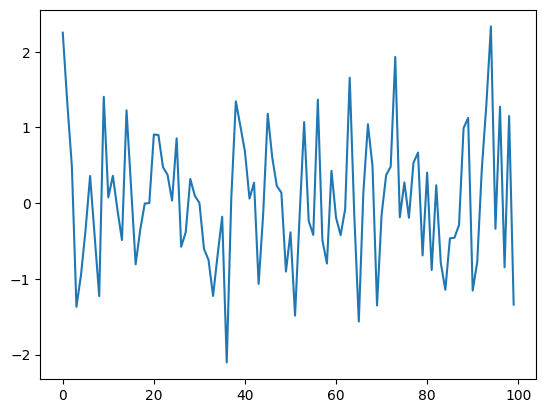

In [19]:
plt.plot(x);

## Adding Axis Labels

             No self-respecting quant leaves a graph without labeled axes. Here are some commands to help with that.

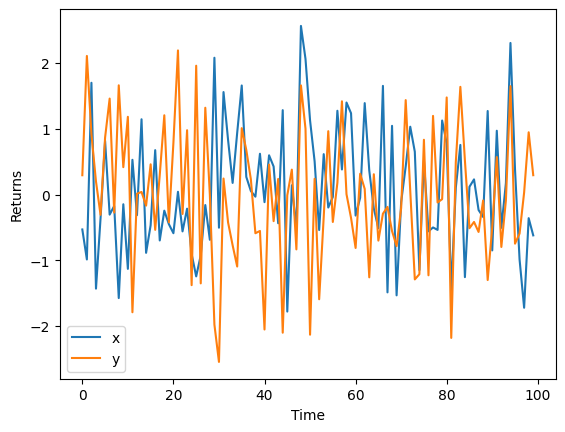

In [21]:
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

plt.plot(x)
plt.plot(y)
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['x', 'y']); # You can label your data for easy reference

## Generating Statistics

         Let's use numpy to take some simple statistics.


In [22]:
np.mean(x)

np.float64(0.07487199209574802)

In [23]:
np.std(x)

np.float64(0.946808050124995)

## Getting Real Pricing Data

         Randomly sampled data can be great for testing ideas, but let's get some real data. We can use urazakgul's isyatirimhisse library and StockData function to do that.

In [40]:
from isyatirimhisse import StockData, Financials
stock_data = StockData()

data = stock_data.get_data(
    symbols='THYAO',
    start_date='02-01-2023'
)

Our data is now a pandas dataframe. We'll go into more about what exactly that is later, but for now, we can just think of it as a table.

In [35]:
data

,DATE,CLOSING_TL,LOW_TL,HIGH_TL,VOLUME_TL,CLOSING_USD,LOW_USD,HIGH_USD,VOLUME_USD,XU100_TL,XU100_USD,CODE
0,2023-01-02,146.80,142.10,147.10,8.798937e+09,7.8349,7.5841,7.8509,4.696122e+08,5661.10,302.140003,THYAO
1,2023-01-03,147.40,146.40,150.40,1.092572e+10,7.8638,7.8104,8.0238,5.828852e+08,5626.57,300.177891,THYAO
2,2023-01-04,144.50,143.60,148.20,7.306022e+09,7.7054,7.6574,7.9027,3.895901e+08,5523.49,294.537715,THYAO
3,2023-01-05,135.20,134.50,147.20,1.078305e+10,7.2020,7.1647,7.8413,5.744067e+08,5116.41,272.547225,THYAO
4,2023-01-06,142.50,132.40,144.20,1.170769e+10,7.5864,7.0487,7.6769,6.232931e+08,5341.96,284.394704,THYAO
...,...,...,...,...,...,...,...,...,...,...,...,...
512,2025-01-22,305.25,300.50,305.75,7.104858e+09,8.5635,8.4302,8.5775,1.993194e+08,10105.37,283.496596,THYAO
513,2025-01-23,309.75,303.00,311.75,1.194366e+10,8.6873,8.4980,8.7434,3.349728e+08,10112.76,283.624148,THYAO
514,2025-01-24,309.00,306.00,311.00,7.933445e+09,8.6643,8.5802,8.7204,2.224528e+08,10104.85,283.338032,THYAO
515,2025-01-27,306.50,304.75,312.50,1.369466e+10,8.5796,8.5306,8.7475,3.833419e+08,9997.85,279.861513,THYAO


This is a pandas dataframe. We can get the closing prices of the stock by using the column name 'CLOSING_TL'. We can also get the date of the closing price by using the column name 'DATE'.

In [45]:
x = data['CLOSING_TL']

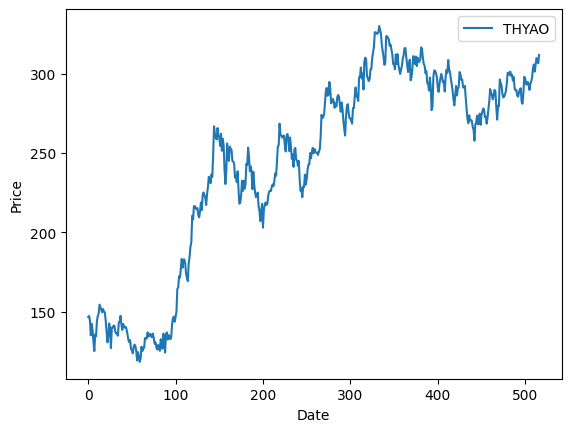

In [46]:
plt.plot(x.index, x.values)
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(['THYAO']);

We provide two series to plot function. First one is the x-axis and the second one is the y-axis. We can get the index of the dataframe by using the index attribute and the values of the dataframe by using the values attribute.
Index is a row number and values are the values of the column.

In [47]:
np.mean(x)

np.float64(242.7503868471954)

In [48]:
np.std(x)

np.float64(61.963279743738816)

## Getting Returns from Prices

             We can use the pct_change function to get returns. Notice how we drop the first element after doing this, as it will be NaN (nothing -> something results in a NaN percent change).

In [49]:
r = x.pct_change()[1:]

In [50]:
r

1      0.004087
2     -0.019674
3     -0.064360
4      0.053994
5     -0.028772
         ...   
512    0.013278
513    0.014742
514   -0.002421
515   -0.008091
516    0.017129
Name: CLOSING_TL, Length: 516, dtype: float64

## Histogram

         Let's plot a histogram of these returns.

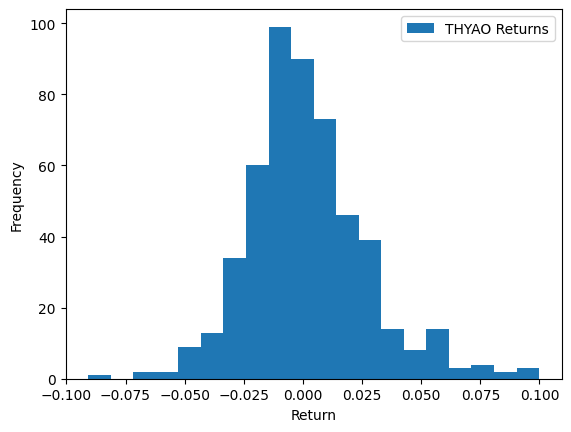

In [63]:
plt.hist(r, bins=20) # Takes the data and number of bins as arguments which is last 20 days at each timepoint
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['THYAO Returns']);

Let's get the mean and standard deviation of the returns.

In [52]:
np.mean(r)

np.float64(0.0017827910044293067)

In [54]:
np.std(r)

np.float64(0.025518430544462147)

In [55]:
r.describe?

In [56]:
r.describe()

count    516.000000
mean       0.001783
std        0.025543
min       -0.090779
25%       -0.013928
50%       -0.000889
75%        0.014777
max        0.099843
Name: CLOSING_TL, dtype: float64

now we have created a histogram of the returns of the stock. We can see that average return is 0.0017 and the standard deviation of the returns is 0.0255. X axis is the return and Y axis is the frequency of the returns.

now let's go backwards and generate data out of a normal distribution with the same mean and standard deviation that we get from THYAO stock. We'll see that we have good reason to suspect that the stock's returns are not normally distributed.

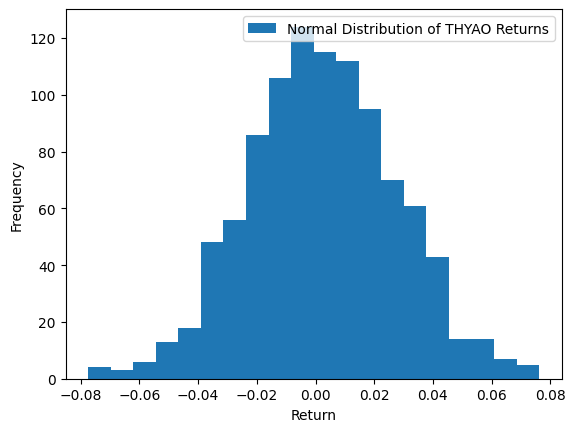

In [62]:
plt.hist(np.random.normal(np.mean(r), np.std(r), 1000), bins=20) # We created a normal distribution with the same mean and std as the stock of 1000 sample size and plotted the histogram with 20 bins
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normal Distribution of THYAO Returns']);

## Generating a Moving Average
pandas has some nice tools to allow us to generate rolling statistics. Here's an example. Notice how there's no moving average for the first 60 days, as we don't have 60 days of data on which to generate the statistic.

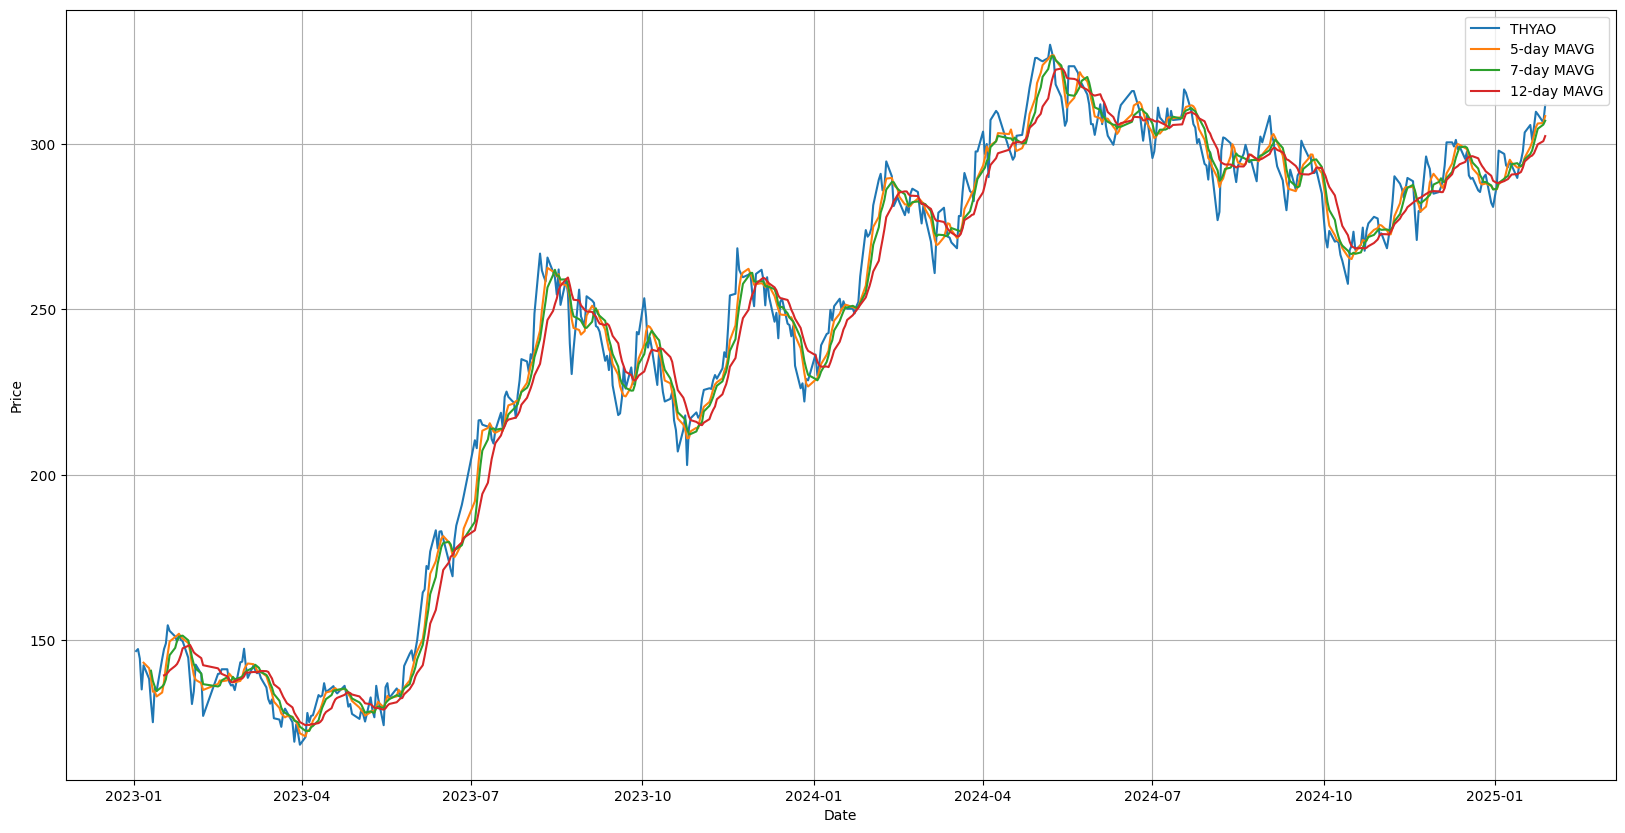

In [84]:
# Take the average of the last 60 days at each timepoint
MAVG = x.rolling(5).mean() # We take the rolling mean of the stock price with a rolling of 60 days and mean function
MAVG2 = x.rolling(7).mean()
MAVG3 = x.rolling(12).mean()
y = data['DATE']
plt.figure(figsize=(20, 10))
plt.grid(True)
plt.plot(y.values, x.values)
plt.plot(y.values, MAVG.values)
plt.plot(y.values, MAVG2.values)
plt.plot(y.values, MAVG3.values)
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(['THYAO', '5-day MAVG', '7-day MAVG', '12-day MAVG']);

In [ ]:

""